In [1]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC

from src.data_prep import y_train, y_test, tf_idf_data_train, tf_idf_data_test
from src.visualizations import evaluate_model, confusion_matrix_heat_map

/Users/stevedye/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/stevedye/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [2]:
pipe = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('SVM', SVC(gamma='auto', random_state=0))])

In [3]:
# parameters = {'C': [0.1, 1, 10],
#               'kernel': ['rbf', 'linear', 'poly', 'sigmoid', 'precomputed']}

parameters = {'SVM__C': [1],
              'SVM__kernel': ['linear']}

In [4]:
svm_classifier = GridSearchCV(pipe, parameters, cv=3, n_jobs= -1)
svm_classifier.fit(tf_idf_data_train, y_train)
print(svm_classifier.best_estimator_)

Pipeline(memory=None,
         steps=[('smote',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=0, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('SVM',
                 SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='auto',
                     kernel='linear', max_iter=-1, probability=False,
                     random_state=0, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


In [5]:
evaluate_model(tf_idf_data_train, y_train, tf_idf_data_test, y_test, svm_classifier)

Training Score:0.8930289275794323
Cross V Score: 0.6118824995911003 +/- 0.0021180037501085424
Testing Score: 0.6330014224751067
Cross & Test Diff: 0.021118922884006408
Standard Deviations Away: 9.971145179947918
[[ 770  357  184]
 [ 381 1408  358]
 [ 202  324  937]]


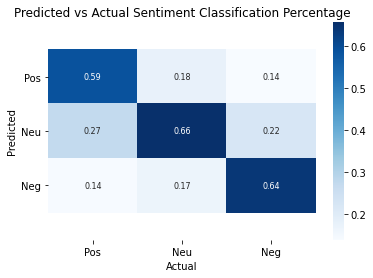

In [6]:
confusion_matrix_heat_map(svm_classifier, tf_idf_data_test, y_test)